In [1]:
#implementation of heart attack analysis using KNN algorithum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df = pd.read_csv(r"heart.csv")

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


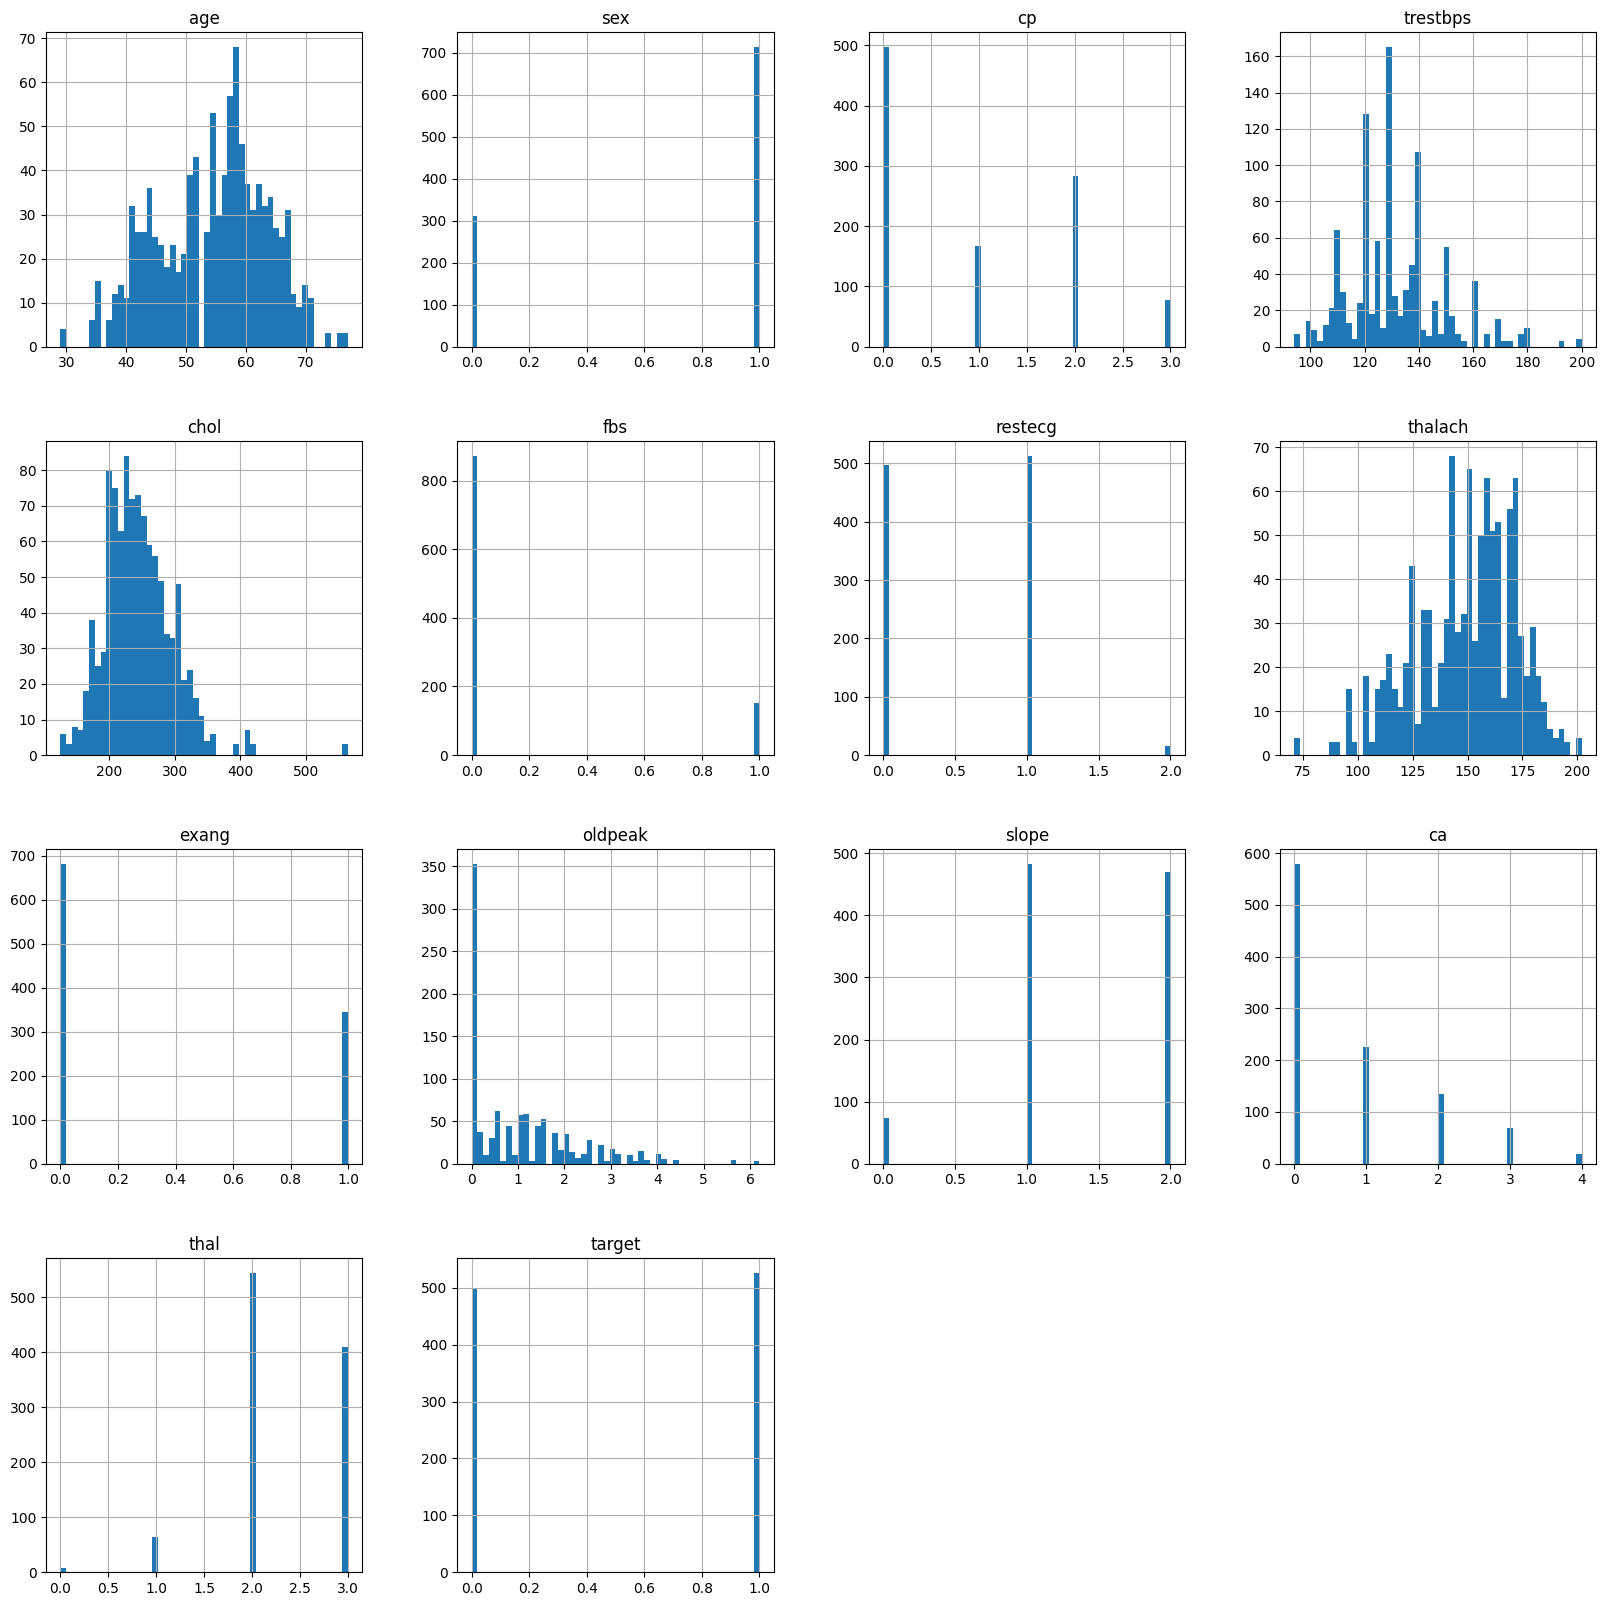

In [12]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [13]:
import seaborn as sns

In [14]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [15]:
df = df.dropna(subset=['age'])

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


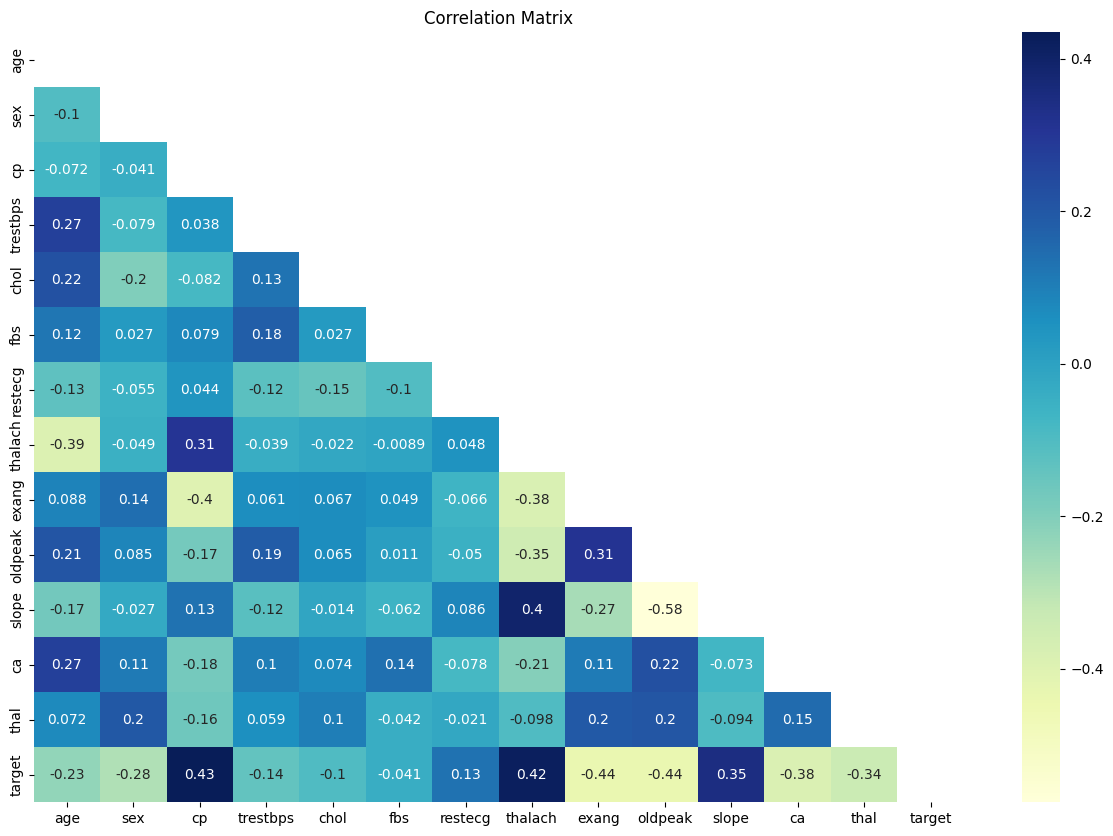

In [28]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

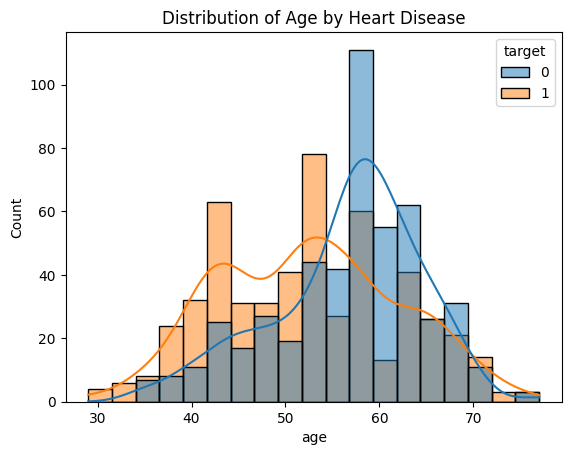

In [29]:
sns.histplot(data=df, x=df['age'], hue='target', kde=True)
plt.title('Distribution of Age by Heart Disease')
plt.xlabel=('age')
plt.ylabel=('count')
plt.show()

<Axes: xlabel='target', ylabel='count'>

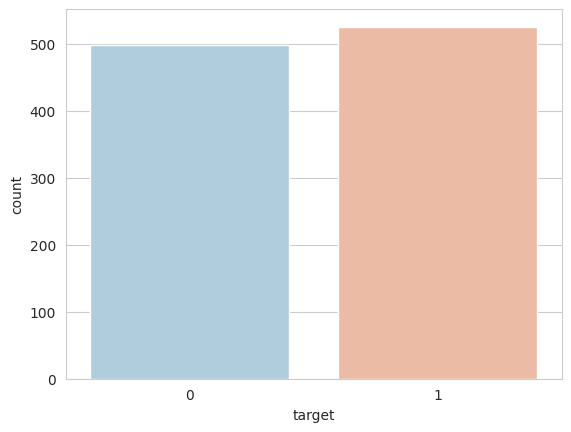

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [31]:
male = len(df[df['target'] == 1])
female = len(df[df['target']== 0])

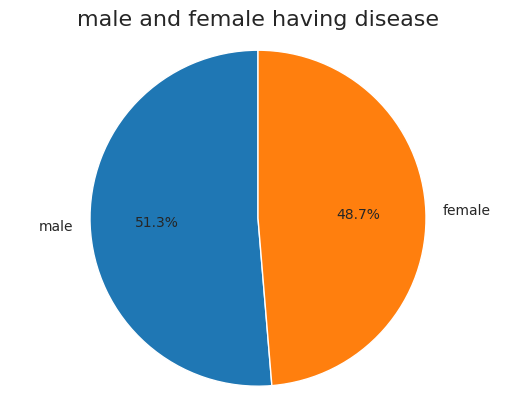

In [32]:
y = ('Male', 'Female')
y_pos = np.arange(len(y))
x = (male, female)
labels = 'male', 'female'
sizes = [male, female]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('male and female having disease', size=16)
plt.show()

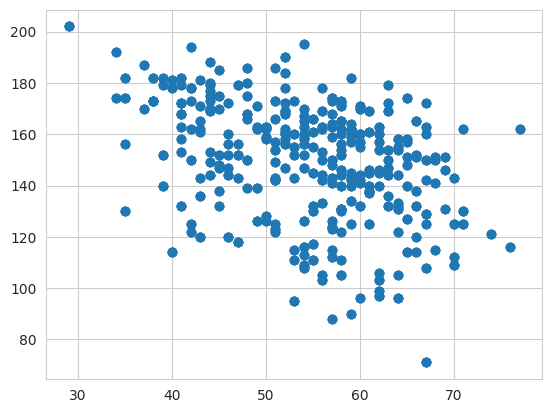

In [33]:
#scatter plot for age and maximum heart rate
plt.scatter(df.age,df.thalach)

In [34]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [36]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [37]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [38]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

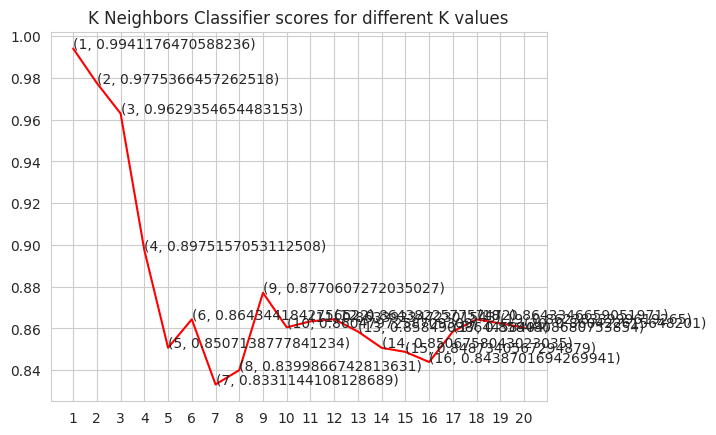

In [39]:

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel=('Number of Neighbors (K)')
plt.ylabel=('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors =12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [41]:
score.mean()

0.864382257757472

In [42]:
#accuracy of this model using cross validation is 86%

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (717, 13)
Shape of test set: (308, 13)


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [47]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[159   0]
 [  3 146]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [48]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

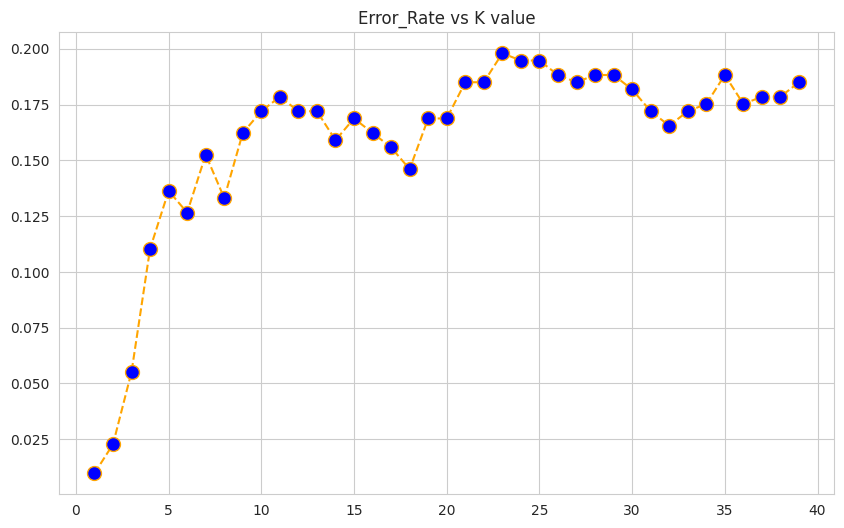

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='orange', linestyle="--",marker='o', markersize=10, markerfacecolor='blue')
plt.title('Error_Rate vs K value')
plt.xlabel=('K')
plt.ylabel=('Error Rate')

In [50]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [51]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[137  22]
 [ 17 132]]


              precision    recall  f1-score   support

           0       0.89      0.86      0.88       159
           1       0.86      0.89      0.87       149

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



In [52]:
#accuracy of this mode is 79 to 88%

In [53]:
from sklearn.svm import SVC


In [54]:
df.shape


(1025, 14)

In [55]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [56]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [58]:
labels  =np.array(df.iloc[:,-1:])

In [59]:
labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [60]:
features = np.array(df.iloc[:,:13])

In [61]:
features

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 0)

In [63]:
from sklearn.preprocessing import StandardScaler
#define min max scaler
scaler = StandardScaler()
#transform data
X_train_scaled = scaler.fit_transform(X_train)

In [64]:
X_train_scaled

array([[ 0.27717522,  0.65226323,  1.02564169, ...,  0.9790949 ,
        -0.73793656, -0.51108759],
       [ 0.49897726,  0.65226323, -0.91725155, ..., -0.66111782,
         1.20371671, -2.12540389],
       [ 1.82978951, -1.53312338, -0.91725155, ..., -0.66111782,
        -0.73793656, -0.51108759],
       ...,
       [ 1.16438338,  0.65226323,  1.99708831, ..., -0.66111782,
         0.23289007, -0.51108759],
       [ 1.38618543,  0.65226323, -0.91725155, ..., -0.66111782,
        -0.73793656, -0.51108759],
       [ 0.60987828,  0.65226323,  1.02564169, ..., -0.66111782,
        -0.73793656, -0.51108759]])

In [65]:
X_train_scaled

array([[ 0.27717522,  0.65226323,  1.02564169, ...,  0.9790949 ,
        -0.73793656, -0.51108759],
       [ 0.49897726,  0.65226323, -0.91725155, ..., -0.66111782,
         1.20371671, -2.12540389],
       [ 1.82978951, -1.53312338, -0.91725155, ..., -0.66111782,
        -0.73793656, -0.51108759],
       ...,
       [ 1.16438338,  0.65226323,  1.99708831, ..., -0.66111782,
         0.23289007, -0.51108759],
       [ 1.38618543,  0.65226323, -0.91725155, ..., -0.66111782,
        -0.73793656, -0.51108759],
       [ 0.60987828,  0.65226323,  1.02564169, ..., -0.66111782,
        -0.73793656, -0.51108759]])

In [66]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[-1.11935087,  0.68313005,  1.0322342 , ...,  1.03563873,
        -0.7181895 , -0.54798356],
       [ 0.40517249, -1.46385011,  0.05997691, ...,  1.03563873,
         1.22218213, -0.54798356],
       [ 0.94964512,  0.68313005, -0.91228038, ...,  1.03563873,
         1.22218213,  1.05943489],
       ...,
       [ 0.18738344,  0.68313005,  1.0322342 , ..., -0.54345399,
         0.25199632, -2.15540202],
       [ 0.29627796, -1.46385011, -0.91228038, ...,  1.03563873,
        -0.7181895 , -0.54798356],
       [-0.03040561,  0.68313005, -0.91228038, ..., -0.54345399,
         0.25199632,  1.05943489]])

In [67]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear', C=0.01)
svm_linear.fit(X_train_scaled, y_train)
print("Accuracy:", svm_linear.score(X_train_scaled,y_train))

Accuracy: 0.8270571827057183


In [68]:
print("Accuracy:", svm_linear.score(X_test_scaled, y_test))

Accuracy: 0.8506493506493507


In [69]:
class DataAnalysis:
    def __init__(self, data):
        self.data = data

    def train_decision_tree(self):
        try:

            X = self.data.drop(columns=['target'])
            y = self.data['target']

            X_encoded = pd.get_dummies(X)

            X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

            dt_classifier = DecisionTreeClassifier(random_state=42)
            dt_classifier.fit(X_train, y_train)

            dt_predictions = dt_classifier.predict(X_test)


            print("Decision Tree Classifier:")
            print("Accuracy:", accuracy_score(y_test, dt_predictions))
            print("Classification Report:")
            print(classification_report(y_test, dt_predictions))
        except Exception as e:
            print("Error occurred during Decision Tree training:", e)

data_analysis = DataAnalysis(df)

data_analysis.train_decision_tree()

Decision Tree Classifier:
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report, accuracy_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

In [72]:
parameters = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg = LogisticRegression(solver='liblinear')
clf = GridSearchCV(logreg, parameters, cv=5)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Best parameters: {'C': 1, 'penalty': 'l1'}


In [73]:
model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [74]:
predictions = model.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [75]:
testing_acc = accuracy_score(y_test, predictions)

print(f"Testing accuracy : {testing_acc: .4f}")

Testing accuracy :  0.8669


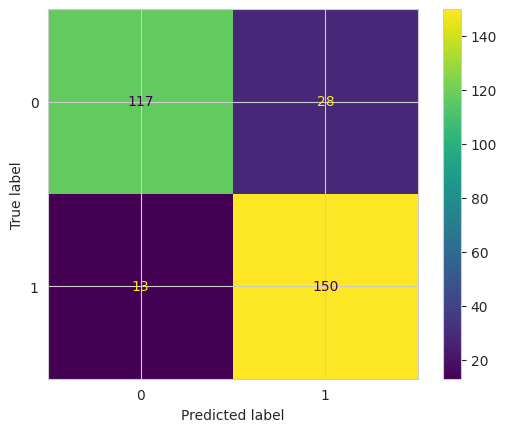

In [76]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)